# autodiffpy Package Demo

In [1]:
!pip install update autodiffpy==1.2.8

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import autodiffpy.autodiffmod as ad
import autodiffpy.autodiff_math as admath


### Part 1: Standard automatic differentiation with elementary operations


In [2]:
# Create autodiff instances
x = ad.autodiff(name='x', val=[1.0, 2.0], der=[1.0, 1.0])
y = ad.autodiff(name='y', val=[-5.0, -3.0], der=[2.0, 1.0])
z = ad.autodiff(name='z', val=[0.5, -4.0], der=[1.0, 1.0])

# Examine each instance
print(x)
print("")
print(y)
print("")
print(z)


value: [ 1.  2.]
derivatives:{'x': array([ 1.,  1.])}

value: [-5. -3.]
derivatives:{'y': array([ 2.,  1.])}

value: [ 0.5 -4. ]
derivatives:{'z': array([ 1.,  1.])}


In [3]:
# Calculate various functions
f1 = (x/y)**2
f2 = x*z - 3 - y + z
f3 = (x**2)**z

# Examine each function
print(f1)
print("")
print(f2)
print("")
print(f3)


value: [ 0.04        0.44444444]
derivatives:{'x': array([ 0.08      ,  0.44444444]), 'y': array([ 0.032    ,  0.2962963])}

value: [  3. -12.]
derivatives:{'x': array([ 0.5, -4. ]), 'y': array([-2., -1.]), 'z': array([ 2.,  3.])}

value: [ 1.          0.00390625]
derivatives:{'x': array([ 1.      , -0.015625]), 'z': array([ 0.        ,  0.00541521])}


In [4]:
# Generate jacobian for just two variables
print(f2.jacobian(order=['x', 'y']))


{'jacobian': array([[ 0.5, -4. ],
       [-2. , -1. ]]), 'order': ['x', 'y']}


### Part 2: Standard automatic differentiation with mathematical operations


In [5]:
# Create autodiff instances again
x = ad.autodiff(name='x', val=[1.0, 2.0], der=[1.0, 1.0])
y = ad.autodiff(name='y', val=[-5.0, -3.0], der=[1.0, 1.0])
z = ad.autodiff(name='z', val=[0.5, -4.0], der=[1.0, 1.0])

# Examine each instance again
print(x)
print("")
print(y)
print("")
print(z)


value: [ 1.  2.]
derivatives:{'x': array([ 1.,  1.])}

value: [-5. -3.]
derivatives:{'y': array([ 1.,  1.])}

value: [ 0.5 -4. ]
derivatives:{'z': array([ 1.,  1.])}


In [6]:
# Calculate various functions
f1 = admath.sinh(admath.cosh(x*np.pi/2.0))
f2 = admath.log(admath.exp(-y/z))
f3 = admath.sqrt(x**2 + z**2)

# Examine each function
print(f1)
print("")
print(f2)
print("")
print(f3)


value: [  6.10674521e+00   5.41117210e+04]
derivatives:{'x': array([  2.23691171e+01,   9.81625436e+05])}

value: [ 10.    -0.75]
derivatives:{'y': array([-2.  ,  0.25]), 'z': array([-20.    ,  -0.1875])}

value: [ 1.11803399  4.47213595]
derivatives:{'x': array([ 0.89442719,  0.4472136 ]), 'z': array([ 0.4472136 , -0.89442719])}


### Part 3: Exploring derivatives calculated through automatic differentiation


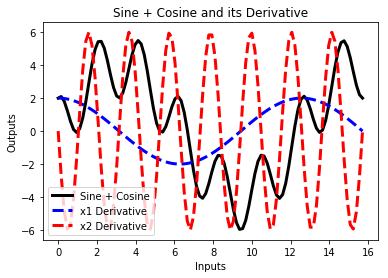

In [7]:
# Create new autodiff instances
numpoints = 100
xval = np.linspace(0, 5*np.pi, numpoints)
x1 = ad.autodiff(name='x1', val=xval, der=np.ones(numpoints))
x2 = ad.autodiff(name='x2', val=xval, der=np.ones(numpoints))

# Create a function
f1 = 4*admath.sin(x1/2) + 2*admath.cos(x2*3)

# Graph first function and its derivative
graph.plot(xval, f1.val, color='black', linewidth=3, linestyle='-', label='Sine + Cosine')
graph.plot(xval, f1.der['x1'], color='blue', linewidth=3, linestyle='--', label='x1 Derivative')
graph.plot(xval, f1.der['x2'], color='red', linewidth=3, linestyle='--', label='x2 Derivative')
graph.xlabel('Inputs')
graph.ylabel('Outputs')
graph.title('Sine + Cosine and its Derivative')
graph.legend(loc='best')
graph.show()


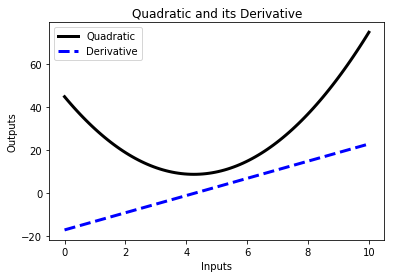

In [8]:
# Create new autodiff instances
numpoints = 100
y = ad.autodiff(name='y', val=np.linspace(0, 10, numpoints), der=np.ones(numpoints))

# Create a function
f2 = (2*((y - 5)**2) + 3*y - 5)

# Graph second function and its derivative
graph.plot(y.val, f2.val, color='black', linewidth=3, linestyle='-', label='Quadratic')
graph.plot(y.val, f2.der['y'], color='blue', linewidth=3, linestyle='--', label='Derivative')
graph.xlabel('Inputs')
graph.ylabel('Outputs')
graph.title('Quadratic and its Derivative')
graph.legend(loc='best')
graph.show()


### Part 4: Gradient descent with MAE loss on noisy linear data


In [9]:
# Read in and process data file (will be used later in this demo)
data = pd.read_csv("demo.csv") # Demo data
X_data = data.drop('y', axis = 1) # Input x-data
Y_true = data['y'] # Actual y-values


In [10]:
# Create initial weights for the data
w = ad.autodiff('w', [1 for i in X_data.columns.values]) # Initialize weights to all ones
f1 = w*X_data # Functional form


Initial loss: 2.43820865061
Final loss: 0.021210588678
Final weights: [ 0.32252461 -0.32005991  0.2945301  -0.32906545  0.31026263]


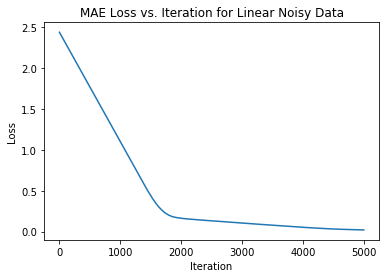

In [11]:
# Run MAE-loss gradient descent
g = ad.gradient_descent(f1, Y_true, loss='MAE', beta=0.001, max_iter=5000, tol=1E-5)

# Print characteristics of this gradient descent
print("Initial loss:", g["loss_array"][0])
print("Final loss:", g["loss_array"][-1])
print(f"Final weights: {g['w'].val}")

# Graph the loss as a function of iterations
xgrid = np.linspace(1, g['num_iter']+1, g["num_iter"])
graph.plot(xgrid, g['loss_array'])
graph.title('MAE Loss vs. Iteration for Linear Noisy Data')
graph.xlabel('Iteration')
graph.ylabel('Loss')
graph.show()

### Part 5: Gradient descent with MSE loss on noisy logistic data


In [12]:
# Create initial weights for the data
w = ad.autodiff('w', [1 for i in X_data.columns.values]) # Initialize weights to all ones
f2 = admath.logistic(w*X_data)


Initial loss: 0.643263339221
Final loss: 0.0541321240815
Final weights: [-0.24665455 -0.68530053 -0.29746136 -0.8148488  -0.25492064]


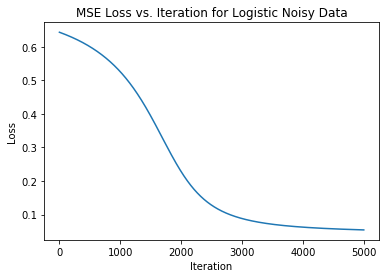

In [13]:
# Run MSE-loss gradient descent
g = ad.gradient_descent(f2, Y_true, loss='MSE', beta=0.005, max_iter=5000, tol=1E-5)

# Print characteristics of this gradient descent
print("Initial loss:", g["loss_array"][0])
print("Final loss:", g["loss_array"][-1])
print(f"Final weights: {g['w'].val}")

# Graph the loss as a function of iterations
xgrid = np.linspace(1, g['num_iter']+1, g["num_iter"])
graph.plot(xgrid, g['loss_array'])
graph.title('MSE Loss vs. Iteration for Logistic Noisy Data')
graph.xlabel('Iteration')
graph.ylabel('Loss')
graph.show()
